## Classification of breast cancer using kNN - CH.SC.U4CSE23240

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

In [5]:
d = load_breast_cancer()
data = pd.DataFrame(d.data, columns=d.feature_names)
data['diagnosis'] = d.target
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [7]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(455, 30)

(455,)

(114, 30)

(114,)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
results=[]
for i in [1,2,3,4,5]:
  model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  Accuracy_score = metrics.accuracy_score(y_test, y_pred)
  results.append(Accuracy_score)

print('KNN [ minkowski ] ' )
print('for n_neighbor=5 : ')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : \n', conf_mat)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')
print('\n',classification_report(y_pred, y_test) )

print (results)

KNN [ minkowski ] 
for n_neighbor=5 : 

 Confusion Matrix : 
 [[40  3]
 [ 3 68]]
Accuracy Score :  0.9473684210526315
Accuracy in Percentage :  94 %

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315]


[Text(0.5, 1.0, 'KNN [minkowski, neighbor=5 ]')]

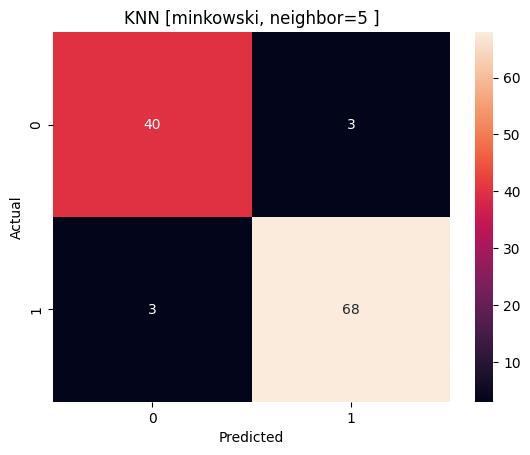

In [11]:
import seaborn as sn
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames = ['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='KNN [minkowski, neighbor=5 ]')

In [12]:
models = pd. DataFrame ( {
'n_neighbors': ['1', '2','3','4','5'],
'Accuracy Score' : [results[0], results[1], results[2], results[3],results[4]]})
models.sort_values(by='Accuracy Score')
print(models.to_string(index=False))

n_neighbors  Accuracy Score
          1        0.938596
          2        0.938596
          3        0.947368
          4        0.956140
          5        0.947368
